In [1]:
# CICIDS2017数据集探索

## 导入必要的库
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob
import warnings
warnings.filterwarnings('ignore')

# 设置中文显示
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

# 设置更好的图表样式
plt.style.use('ggplot')
sns.set(style="whitegrid")

## 设置数据路径
data_dir = '/root/autodl-tmp/projects/DL/dataset/extracted/MachineLearningCVE'
# 获取所有CSV文件
csv_files = glob(os.path.join(data_dir, "*.csv"))

print(f"找到 {len(csv_files)} 个CSV文件:")
for file in csv_files:
    print(f"- {os.path.basename(file)}")

找到 8 个CSV文件:
- Wednesday-workingHours.pcap_ISCX.csv
- Tuesday-WorkingHours.pcap_ISCX.csv
- Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv
- Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv
- Monday-WorkingHours.pcap_ISCX.csv
- Friday-WorkingHours-Morning.pcap_ISCX.csv
- Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv
- Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv


In [2]:
## 1. 获取数据集基本信息

def get_dataset_info(csv_files):
    """获取数据集基本信息"""
    print("="*50)
    print("CICIDS2017数据集基本信息")
    print("="*50)
    
    total_rows = 0
    file_info = []
    
    for file_path in csv_files:
        file_name = os.path.basename(file_path)
        file_size = os.path.getsize(file_path) / (1024*1024)  # 转换为MB
        
        # 使用wc -l命令快速获取行数（比pandas读取更快）
        try:
            line_count = int(os.popen(f"wc -l '{file_path}'").read().split()[0])
        except:
            # 如果命令失败，尝试使用pandas
            df = pd.read_csv(file_path, nrows=1)
            line_count = len(pd.read_csv(file_path, usecols=[0]))
        
        total_rows += line_count
        file_info.append({
            'file_name': file_name,
            'size_mb': file_size,
            'rows': line_count
        })
    
    # 创建DataFrame显示文件信息
    info_df = pd.DataFrame(file_info)
    info_df = info_df.sort_values(by='rows', ascending=False)
    
    # 显示基本信息
    print(f"总文件数: {len(csv_files)}")
    print(f"总数据行数: {total_rows:,}")
    print(f"总数据大小: {sum(info['size_mb'] for info in file_info):.2f} MB")
    
    return info_df

# 获取并显示数据集信息
dataset_info = get_dataset_info(csv_files)
dataset_info

CICIDS2017数据集基本信息
总文件数: 8
总数据行数: 2,830,751
总数据大小: 843.66 MB


,file_name,size_mb,rows
0,Wednesday-workingHours.pcap_ISCX.csv,214.735408,692704
4,Monday-WorkingHours.pcap_ISCX.csv,168.731611,529919
1,Tuesday-WorkingHours.pcap_ISCX.csv,128.821368,445910
3,Thursday-WorkingHours-Afternoon-Infilteration....,79.252659,288603
6,Friday-WorkingHours-Afternoon-PortScan.pcap_IS...,73.343437,286468
7,Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv,73.551044,225746
5,Friday-WorkingHours-Morning.pcap_ISCX.csv,55.615163,191034
2,Thursday-WorkingHours-Morning-WebAttacks.pcap_...,49.613250,170367


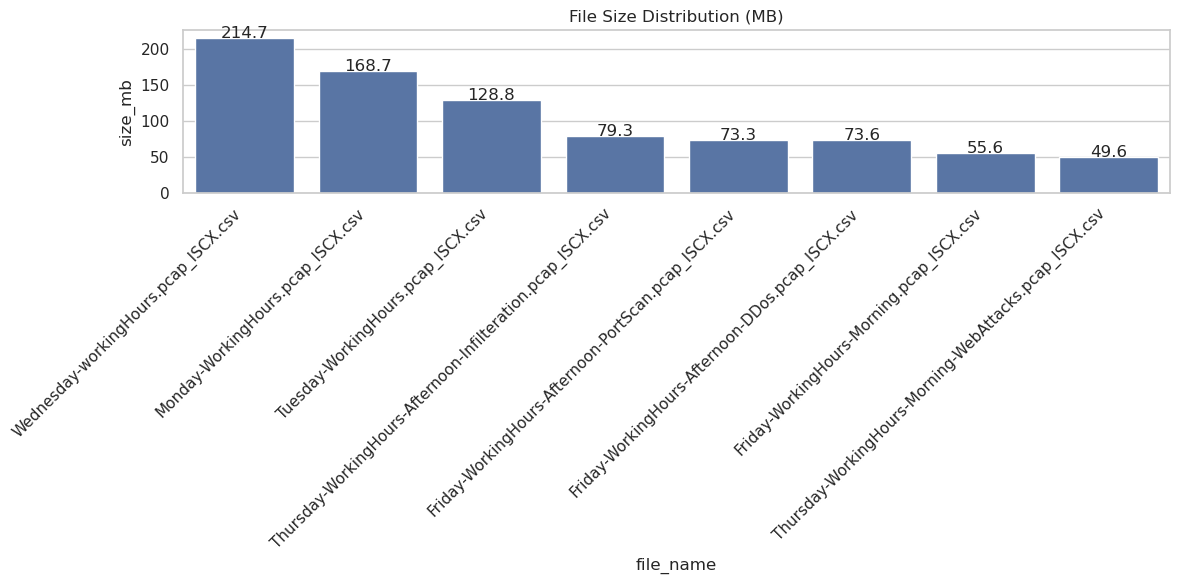

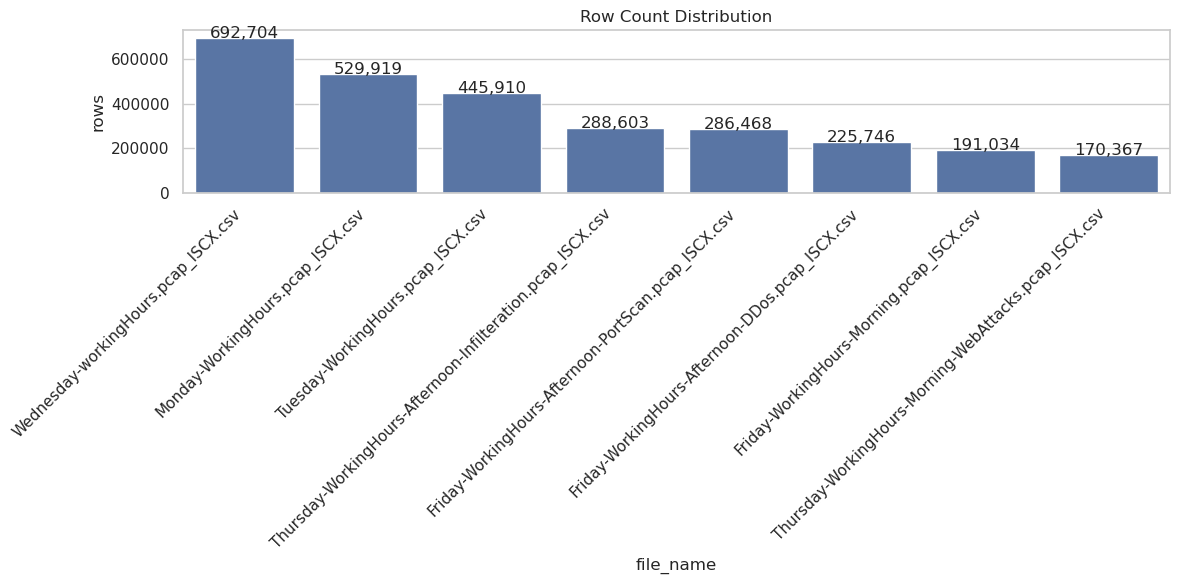

In [3]:
## 2. 数据可视化 - 文件大小和行数分布

# 绘制文件大小分布
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='file_name', y='size_mb', data=dataset_info)
plt.title('File Size Distribution (MB)')
plt.xticks(rotation=45, ha='right')
for i, v in enumerate(dataset_info['size_mb']):
    ax.text(i, v + 0.1, f"{v:.1f}", ha='center')
plt.tight_layout()
plt.show()

# 绘制行数分布
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='file_name', y='rows', data=dataset_info)
plt.title('Row Count Distribution')
plt.xticks(rotation=45, ha='right')
for i, v in enumerate(dataset_info['rows']):
    ax.text(i, v + 1000, f"{v:,}", ha='center')
plt.tight_layout()
plt.show()